In [2]:
import pandas as pd 
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from matplotlib.pyplot import figure
os.chdir('C:\\Users\\mohda\\Documents\\kffnf_jugnu_private')
pd.options.display.max_columns = None


In [3]:
poi=pd.read_csv("data/processed/lahore_agg_160vor.csv")
poi=poi.fillna(0)
pd.set_option('display.max_columns', None)

poi.head()

vor_id        area_sq   area_sqrt       sum_pop   mean_pop     max_pop  \
0  vor100  934004.086266  966.438868  18674.722656  52.457085  125.799904   
1  vor105  934800.457813  966.850794  12152.642578  35.743065   54.494709   
2  vor106  934648.217220  966.772061  27830.583984  81.854660  144.508072   
3  vor110  934038.832432  966.456845  19297.390625  56.757030  109.337059   
4  vor111  933886.380886  966.377970  20934.593750  61.572334  140.611572   

     min_pop  occurances-accounting  occurances-airport  \
0  15.140641                    0.0                 0.0   
1  20.967367                    0.0                 0.0   
2  31.233101                    0.0                 0.0   
3  26.348337                    0.0                 0.0   
4  19.793751                    0.0                 0.0   

   occurances-amusement_park  occurances-aquarium  occurances-art_gallery  \
0                        0.0                  0.0                     0.0   
1                        0.0                  0.0                     0.0   
2                        0.0                  0.0                     0.0   
3                        0.0                  0.0                     0.0   
4                        0.0                  0.0                     0.0   

   occurances-atm  occurances-bakery  occurances-bank  occurances-bar  \
0             0.0                0.0              0.0             0.0   
1             0.0                0.0              0.0             0.0   
2             0.0                0.0              1.0             0.0   
3             0.0                0.0              0.0             0.0   
4             0.0                0.0              0.0             0.0   

   occurances-beauty_salon  occurances-bicycle_store  occurances-book_store  \
0                      1.0                       0.0                    0.0   
1                      0.0                       0.0                    0.0   
2                      0.0                       0.0                    0.0   
3                      0.0                       0.0                    0.0   
4                      0.0                       0.0                    0.0   

   occurances-bus_station  occurances-cafe  occurances-campground  \
0                     0.0              0.0                    0.0   
1                     0.0              0.0                    0.0   
2                     0.0              2.0                    0.0   
3                     0.0              1.0                    0.0   
4                     0.0              0.0                    0.0   

   occurances-car_dealer  occurances-car_rental  occurances-car_repair  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    2.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   occurances-car_wash  occurances-cemetery  occurances-church  \
0                  0.0                  0.0                0.0   
1                  0.0                  0.0                0.0   
2                  1.0                  0.0                0.0   
3                  0.0                  0.0                0.0   
4                  0.0                  0.0                0.0   

   occurances-city_hall  occurances-clothing_store  \
0                   0.0                        0.0   
1                   0.0                        0.0   
2                   0.0                        2.0   
3                   0.0                        0.0   
4                   0.0                        0.0   

   occurances-convenience_store  occurances-courthouse  occurances-dentist  \
0                           0.0                    0.0                 0.0   
1                           0.0                    0.0                

In [4]:
var_poi=pd.DataFrame(poi.var(),columns={'var'})
var_poi.sort_values(by='var',ascending=False).head(15
                                                  )

var
area_sq                        1.308770e+09
sum_pop                        1.061898e+08
user_ratin-shopping_mall       3.096237e+07
user_ratin-point_of_interest   1.603517e+07
user_ratin-restaurant          1.153211e+07
user_ratin-mosque              7.348164e+06
user_ratin-lodging             6.166061e+06
user_ratin-stadium             3.931290e+06
user_ratin-tourist_attraction  3.486054e+06
user_ratin-zoo                 3.332343e+06
user_ratin-park                1.101923e+06
user_ratin-airport             9.189424e+05
user_ratin-food                8.188345e+05
user_ratin-movie_theater       8.093414e+05
user_ratin-amusement_park      6.906022e+05

In [5]:
ratings=['area_sq','sum_pop','user_ratin-shopping_mall','user_ratin-point_of_interest','user_ratin-restaurant',
                  'user_ratin-lodging','user_ratin-tourist_attraction','user_ratin-park','user_ratin-food']

occurances=['occurances-atm','occurances-bank','occurances-cafe',
                 'occurances-clothing_store','occurances-convenience_store','occurances-food','occurances-grocery_or_supermarket','occurances-hospital','occurances-park',
                  'occurances-primary_school','occurances-supermarket']
prices=['price_leve-department_store','price_leve-restaurant','price_leve-store']
poi_total=['occurances-point_of_interest','price_leve-point_of_interest']

In [6]:
lhr=pd.read_csv("data/summary-stats/combined-pop-vor/lhr_pop_vor_fb_combined.csv")
len(lhr['vor_id'].unique())


580

In [7]:

lhr=pd.read_csv("data/summary-stats/combined-pop-vor/lhr_pop_vor_fb_combined.csv")
#dem_lhr=pd.merge(lhr,poi,on="vor_id")

isb=pd.read_csv("data/summary-stats/combined-pop-vor/isb_pop_vor_fb_combined.csv")
#dem_isb=pd.merge(isb,poi,on="vor_id")

khi=pd.read_csv("data/summary-stats/combined-pop-vor/khi_pop_vor_fb_combined.csv")

#dem_khi=pd.merge(khi,poi,on="vor_id")

#Remove these lines if we get POI data
dem_khi=khi
dem_lhr=lhr
dem_isb=isb

prop_lahore=pd.read_csv("data/processed/lahore_prop_grid.csv")
prop_khi=pd.read_csv("data/processed/karachi_prop_grid.csv")
prop_isb=pd.read_csv("data/processed/islamabad_prop_grid.csv")

dem_shortlisted=['vor_id','sum_pop_elderly','sum_pop_youth','sum_pop_general','sum_pop_women','sum_pop','min_pop','max_pop']
occ_shortlisted=['vor_id','occurances-food',
'occurances-grocery_or_supermarket',
'occurances-mosque',
'occurances-point_of_interest',
'occurances-restaurant',
'occurances-school'
]


#convert to marlas. Kind of redundant since they'll be normalized anyway.
prop_isb['res_value_marla']=prop_isb['res_value_sqyard']*30.25
prop_khi['res_value_marla']=prop_khi['res_value_sqyard']*30.25

prop_isb['com_value_marla']=prop_isb['com_value_sqyard']*30.25
prop_khi['com_value_marla']=prop_khi['com_value_sqyard']*30.25



#Extract demographic characteristics and household data. 
dem_hh=pd.read_spss('data/data_hies/data_in_stata/sec 1a.sav')
hh_chars=pd.read_csv("data/data_hies/hh_chars.csv")
dem_hh=dem_hh[['hhcode','Province','Region','Psu','idc','age']]
dem_hh['young']=(dem_hh['age']-dem_hh['age'].mean())/(np.sqrt(dem_hh['age'].var()))
dem_hh['young_hh']=dem_hh.groupby(['hhcode','Province','Region'],as_index=False).young.transform('mean')


exp_lahore=pd.read_csv("data/processed/exp_lahore.csv")
exp_isb=pd.read_csv("data/processed/exp_isb.csv")
exp_khi=pd.read_csv("data/processed/exp_khi.csv")


#Merge the rent
exp_lahore=pd.merge(exp_lahore,hh_chars,on='hhcode',how="left",suffixes=('', '_y'))
exp_lahore
exp_lahore=exp_lahore[exp_lahore['itc']=="rent"]
exp_lahore.drop(exp_lahore.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

exp_isb=pd.merge(exp_isb,hh_chars,on='hhcode',how="left",suffixes=('', '_y'))
exp_isb=exp_isb[exp_isb['itc']=="rent"]
exp_isb.drop(exp_isb.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

exp_khi=pd.merge(exp_khi,hh_chars,on='hhcode',how="left",suffixes=('', '_y'))
exp_khi=exp_khi[exp_khi['itc']=="rent"]
exp_khi.drop(exp_khi.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)


#Merge expenditure with household
exp_lahore=pd.merge(exp_lahore,dem_hh,on='hhcode',how="left",suffixes=('', '_y'))
exp_lahore.drop(exp_lahore.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
exp_isb=pd.merge(exp_isb,dem_hh,on='hhcode',how="left",suffixes=('', '_y'))
exp_isb.drop(exp_isb.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
exp_khi=pd.merge(exp_khi,dem_hh,on='hhcode',how="left",suffixes=('', '_y'))
exp_khi.drop(exp_khi.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

#Normalize rent by number of rooms
exp_lahore['v1']=exp_lahore['v1']/exp_lahore['n_rooms']
exp_lahore['rent_norm']=(exp_lahore['v1']-exp_lahore['v1'].mean())/(exp_lahore['v1'].var())**0.5
exp_isb['v1']=exp_isb['v1']/exp_isb['n_rooms']
exp_isb['rent_norm']=(exp_isb['v1']-exp_isb['v1'].mean())/(exp_isb['v1'].var())**0.5
exp_khi['v1']=exp_khi['v1']/exp_khi['n_rooms']
exp_khi['rent_norm']=(exp_khi['v1']-exp_khi['v1'].mean())/(exp_khi['v1'].var())**0.5


#Normalize population in dem 
for i in [prop_isb,prop_lahore,prop_khi]:
    i['com_norm_vor']=(i['com_value_marla']-i['com_value_marla'].mean())/(i['com_value_marla'].var())**0.5
    i['rent_norm_vor']=(i['res_value_marla']-i['res_value_marla'].mean())/(i['res_value_marla'].var())**0.5



#For each of the three cities, normalize all these variables
for i in [dem_lhr,dem_isb,dem_khi]:
    i['perc_youth']=i['sum_pop_youth']/i['sum_pop_general']
    i['min_perc_youth']=i['min_pop_youth']/i['min_pop_general']
    i['max_perc_youth']=i['max_pop_youth']/i['max_pop_general']
     
    i['pop_norm']=(i['sum_pop_general']-i['sum_pop_general'].mean())/(i['sum_pop_general'].var())**0.5
    i['max_pop_norm']=(i['max_pop_general']-i['max_pop_general'].mean())/(i['max_pop_general'].var())**0.5
    i['min_pop_norm']=(i['min_pop_general']-i['min_pop_general'].mean())/(i['min_pop_general'].var())**0.5
    i['perc_youth']=(i['perc_youth']-i['perc_youth'].mean())/(i['perc_youth'].var())**0.5
    i['max_perc_youth']=(i['max_perc_youth']-i['max_perc_youth'].mean())/(i['max_perc_youth'].var())**0.5
    i['min_perc_youth']=(i['min_perc_youth']-i['min_perc_youth'].mean())/(i['min_perc_youth'].var())**0.5
    i['mean_age']=((i['mean_pop_youth']/i['mean_pop_general'])*20)+((i['mean_pop_elderly']/i['mean_pop_general'])*70)+((i['mean_pop_general']/i['mean_pop_general'])*40)
    i['mean_age']=(i['mean_age']-i['mean_age'].mean())/(i['mean_age'].var())**0.5
    i['std_age']=np.sqrt((i['std_pop_youth']**2)*(400)+(i['std_pop_elderly']**2)*(4900)+(i['std_pop_general']**2)*(1600))
    i['std_age']=(i['std_age']-i['std_age'].mean())/(i['std_age'].var())**0.5

#Get rid of infinities
    i.replace([np.inf, -np.inf], np.nan, inplace=True)
    i.replace(np.nan, 0, inplace=True)



In [8]:
dem_khi.head()

vor_id  sum_pop_general  mean_pop_general  max_pop_general  min_pop_general  \
0   vor0       121.646556          0.043461        30.411639              0.0   
1   vor1      3771.043236          0.821041        60.823278              0.0   
2   vor2      1338.112116          0.369542        60.823278              0.0   
3   vor3       152.058195          0.032568        30.411639              0.0   
4   vor4      2189.638008          0.570962        60.823278              0.0   

   std_pop_general  sum_pop_elderly  mean_pop_elderly  max_pop_elderly  \
0         1.148835          5.71876          0.002043          1.42969   
1         5.245659        177.28156          0.038598          2.85938   
2         3.554480         62.90636          0.017373          2.85938   
3         0.994673          7.14845          0.001531          1.42969   
4         4.410162        102.93768          0.026842          2.85938   

   min_pop_elderly  std_pop_elderly  sum_pop_women  mean_pop_women  \
0              0.0         0.054008      56.278692        0.020107   
1              0.0         0.246605    1744.639452        0.379847   
2              0.0         0.167101     619.065612        0.170965   
3              0.0         0.046761      70.348365        0.015067   
4              0.0         0.207327    1013.016456        0.264150   

   max_pop_women  min_pop_women  std_pop_women  sum_pop_youth  mean_pop_youth  \
0      14.069673            0.0       0.531498      29.220796        0.010440   
1      28.139346            0.0       2.426857     905.844676        0.197223   
2      28.139346            0.0       1.644448     321.428756        0.088768   
3      14.069673            0.0       0.460176      36.525995        0.007823   
4      28.139346            0.0       2.040322     525.974328        0.137151   

   max_pop_youth  min_pop_youth  std_pop_youth  sum_pop_reproductive  \
0       7.305199            0.0       0.275962             29.309412   
1      14.610398            0.0       1.260063            908.591772   
2      14.610398            0.0       0.853824            322.403532   
3       7.305199            0.0       0.238931             36.636765   
4      14.610398            0.0       1.059368            527.569416   

   mean_pop_reproductive  max_pop_reproductive  min_pop_reproductive  \
0               0.010471              7.327353                   0.0   
1               0.197821             14.654706                   0.0   
2               0.089037             14.654706                   0.0   
3               0.007847              7.327353                   0.0   
4               0.137567             14.654706                   0.0   

   std_pop_reproductive  perc_youth  min_perc_youth  max_perc_youth  pop_norm  \
0              0.276799    1.129778             0.0        1.122269 -0.401532   
1              1.263884    1.129778             0.0        1.122269 -0.295665   
2              0.856413    1.129778             0.0        1.122269 -0.366243   
3              0.239656    1.129778             0.0        1.122269 -0.400649   
4              1.062581    1.129778             0.0        1.122269 -0.341540   

   max_pop_norm  min_pop_norm  mean_age   std_age  
0     -0.179437           0.0  0.142583 -0.457772  
1      0.477896           0.0  0.142583 -0.116920  
2      0.477896           0.0  0.142583 -0.257625  
3     -0.179437           0.0  0.142583 -0.470599  
4      0.477896           0.0  0.142583 -0.186433

In [9]:
dem_lhr.shape

(580, 34)

In [10]:
dem_shortlisted=['vor_id','sum_pop_elderly','sum_pop_youth','sum_pop_general','sum_pop_women','sum_pop','min_pop','max_pop']
occ_shortlisted=['vor_id','occurances-food',
'occurances-grocery_or_supermarket',
'occurances-mosque',
'occurances-point_of_interest',
'occurances-restaurant',
'occurances-school'
]


In [11]:

dem_isb.shape

(328, 34)

<AxesSubplot:>

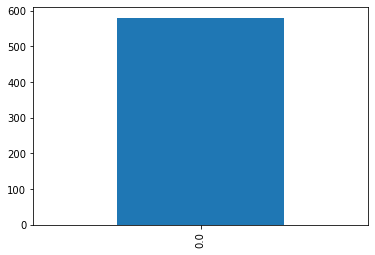

In [12]:
dem_lhr['min_pop_youth'].value_counts().plot(kind="bar")


In [13]:
hh_chars=pd.read_csv("data/data_hies/hh_chars.csv")
hh_chars.head()

Unnamed: 0        hhcode           Province Region         PSU  \
0           0  1.102100e+09  Khyber Paktunkhwa  Urban  11021001.0   
1           1  1.102100e+09  Khyber Paktunkhwa  Urban  11021001.0   
2           2  1.102100e+09  Khyber Paktunkhwa  Urban  11021001.0   
3           3  1.102100e+09  Khyber Paktunkhwa  Urban  11021001.0   
4           4  1.102100e+09  Khyber Paktunkhwa  Urban  11021001.0   

               house/compound        floor_material       roof_material  \
0  Independent house/compound  Cement/ Cement Tiles   Sheet/cement/iron   
1  Independent house/compound  Cement/ Cement Tiles             RCC/RBC   
2  Independent house/compound            Earth/Sand         Wood/Bamboo   
3  Independent house/compound  Cement/ Cement Tiles   Sheet/cement/iron   
4  Independent house/compound  Cement/ Cement Tiles         Wood/Bamboo   

              toilet_type  n_internet  n_mobile_phones  n_landlines  \
0  Flush connected to pit         3.0              3.0          NaN   
1  Flush connected to pit         2.0              1.0          1.0   
2  Flush connected to pit         NaN              2.0          NaN   
3  Flush connected to pit         1.0              1.0          NaN   
4  Flush connected to pit         NaN              1.0          NaN   

   n_broadband  n_wireless  n_mobile_subscriptions  n_rooms  
0          NaN         NaN                     3.0      3.0  
1          1.0         NaN                     1.0      5.0  
2          NaN         NaN                     NaN      2.0  
3          NaN         NaN                     1.0      3.0  
4          NaN         NaN                     NaN      1.0

In [14]:
dem_khi.head()

vor_id  sum_pop_general  mean_pop_general  max_pop_general  min_pop_general  \
0   vor0       121.646556          0.043461        30.411639              0.0   
1   vor1      3771.043236          0.821041        60.823278              0.0   
2   vor2      1338.112116          0.369542        60.823278              0.0   
3   vor3       152.058195          0.032568        30.411639              0.0   
4   vor4      2189.638008          0.570962        60.823278              0.0   

   std_pop_general  sum_pop_elderly  mean_pop_elderly  max_pop_elderly  \
0         1.148835          5.71876          0.002043          1.42969   
1         5.245659        177.28156          0.038598          2.85938   
2         3.554480         62.90636          0.017373          2.85938   
3         0.994673          7.14845          0.001531          1.42969   
4         4.410162        102.93768          0.026842          2.85938   

   min_pop_elderly  std_pop_elderly  sum_pop_women  mean_pop_women  \
0              0.0         0.054008      56.278692        0.020107   
1              0.0         0.246605    1744.639452        0.379847   
2              0.0         0.167101     619.065612        0.170965   
3              0.0         0.046761      70.348365        0.015067   
4              0.0         0.207327    1013.016456        0.264150   

   max_pop_women  min_pop_women  std_pop_women  sum_pop_youth  mean_pop_youth  \
0      14.069673            0.0       0.531498      29.220796        0.010440   
1      28.139346            0.0       2.426857     905.844676        0.197223   
2      28.139346            0.0       1.644448     321.428756        0.088768   
3      14.069673            0.0       0.460176      36.525995        0.007823   
4      28.139346            0.0       2.040322     525.974328        0.137151   

   max_pop_youth  min_pop_youth  std_pop_youth  sum_pop_reproductive  \
0       7.305199            0.0       0.275962             29.309412   
1      14.610398            0.0       1.260063            908.591772   
2      14.610398            0.0       0.853824            322.403532   
3       7.305199            0.0       0.238931             36.636765   
4      14.610398            0.0       1.059368            527.569416   

   mean_pop_reproductive  max_pop_reproductive  min_pop_reproductive  \
0               0.010471              7.327353                   0.0   
1               0.197821             14.654706                   0.0   
2               0.089037             14.654706                   0.0   
3               0.007847              7.327353                   0.0   
4               0.137567             14.654706                   0.0   

   std_pop_reproductive  perc_youth  min_perc_youth  max_perc_youth  pop_norm  \
0              0.276799    1.129778             0.0        1.122269 -0.401532   
1              1.263884    1.129778             0.0        1.122269 -0.295665   
2              0.856413    1.129778             0.0        1.122269 -0.366243   
3              0.239656    1.129778             0.0        1.122269 -0.400649   
4              1.062581    1.129778             0.0        1.122269 -0.341540   

   max_pop_norm  min_pop_norm  mean_age   std_age  
0     -0.179437           0.0  0.142583 -0.457772  
1      0.477896           0.0  0.142583 -0.116920  
2      0.477896           0.0  0.142583 -0.257625  
3     -0.179437           0.0  0.142583 -0.470599  
4      0.477896           0.0  0.142583 -0.186433

In [15]:
figure(figsize=(12,13), dpi=1500)

#Plot KDE distribution on top of observed distribution. 
plt.subplot(3, 2, 1)
ax=prop_khi['rent_norm_vor'].plot.hist(bins=20, density=True, edgecolor='w', linewidth=0.5)
prop_khi['rent_norm_vor'].plot.density(color='k', alpha=0.5, ax=ax) 
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Rent distribution in Karachi', fontsize=10, pad=5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.4, 
                    wspace=0.4, 
                    hspace=0.4)
plt.subplot(3, 2, 2)
ax=exp_khi['rent_norm'].plot.hist(bins=20, density=True, edgecolor='w', linewidth=0.5)
exp_khi['rent_norm'].plot.density(color='k', alpha=0.5, ax=ax) 
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Rent distribution for HIES respondents in Karachi', fontsize=10, pad=5)
plt.savefig('viz/hies/rent_kde_khi.png')

#Islamabad
plt.subplot(3, 2, 3)
ax=prop_isb['rent_norm_vor'].plot.hist(bins=20, density=True, edgecolor='w', linewidth=0.5)
prop_isb['rent_norm_vor'].plot.density(color='k', alpha=0.5, ax=ax) 
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Rent distribution in Islamabad', fontsize=10, pad=5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.4, 
                    wspace=0.4, 
                    hspace=0.4)
plt.subplot(3, 2, 4)
ax=exp_isb['rent_norm'].plot.hist(bins=20, density=True, edgecolor='w', linewidth=0.5)
exp_isb['rent_norm'].plot.density(color='k', alpha=0.5, ax=ax) 
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Rent distribution for HIES respondents in Islamabad', fontsize=10, pad=5)
plt.savefig('viz/hies/rent_kde_khi.png')


#Lahore
plt.subplot(3, 2, 5)
ax=prop_lahore['rent_norm_vor'].plot.hist(bins=20, density=True, edgecolor='w', linewidth=0.5)
prop_lahore['rent_norm_vor'].plot.density(color='k', alpha=0.5, ax=ax) 
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Rent distribution in Lahore', fontsize=10, pad=5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.4, 
                    wspace=0.4, 
                    hspace=0.4)
plt.subplot(3, 2, 6)
ax=exp_lahore['rent_norm'].plot.hist(bins=20, density=True, edgecolor='w', linewidth=0.5)
exp_lahore['rent_norm'].plot.density(color='k', alpha=0.5, ax=ax) 
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.legend(labels=['KDE'], frameon=False)
ax.set_title('Rent distribution for HIES respondents in Lahore', fontsize=10, pad=5)

plt.tight_layout()
plt.savefig('viz/hies/rent_kde_khi.png')


In [16]:
#These are our final two datasets
vor_lhr=pd.merge(prop_lahore,dem_lhr,on="vor_id")
vor_khi=pd.merge(prop_khi,dem_khi,on="vor_id")
vor_isb=pd.merge(prop_isb,dem_isb,on="vor_id")






In [17]:
# we need to use OLS to estimate the direction of change in rent with population of grid
import statsmodels.api as sm
y=vor_lhr['rent_norm_vor']
x=vor_lhr[['pop_norm','std_age']]
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
lhr_elas_rent=results.params['pop_norm']
lhr_elas_youth=results.params['std_age']

y=vor_isb['rent_norm_vor']
x=vor_isb[['pop_norm','std_age']]
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
isb_elas_rent=results.params['pop_norm']
isb_elas_youth=results.params['std_age']

y=vor_khi['rent_norm_vor']
x=vor_khi[['pop_norm','std_age']]
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
khi_elas_rent=results.params['pop_norm']
khi_elas_youth=results.params['std_age']
cov=vor_khi[['mean_age','rent_norm_vor']].cov()
cov_khi=cov.iloc[0,1]

cov=vor_lhr[['mean_age','rent_norm_vor']].cov()
cov_lhr=cov.iloc[0,1]

cov=vor_isb[['mean_age','rent_norm_vor']].cov()
cov_isb=cov.iloc[0,1]

print(cov_lhr,cov_khi,cov_isb)


-0.025649919337915723 0.32788732392604 0.10197814870481024


In [18]:
vor_khi[['mean_age','rent_norm_vor']].cov()

mean_age  rent_norm_vor
mean_age       0.830660       0.327887
rent_norm_vor  0.327887       1.000000

In [19]:
exp_isb.head()

Unnamed: 0        hhcode Province Region         PSU   itc       v1  \
0       46668  2.012100e+09   Punjab  Urban  20121001.0  rent  12000.0   
1       46668  2.012100e+09   Punjab  Urban  20121001.0  rent  12000.0   
2       46668  2.012100e+09   Punjab  Urban  20121001.0  rent  12000.0   
3       46721  2.012101e+09   Punjab  Urban  20121005.0  rent  12000.0   
4       46721  2.012101e+09   Punjab  Urban  20121005.0  rent  12000.0   

          psu       weight  district    stratum    code  \
0  20121001.0  2561.023320      2012  ISLAMABAD  2012.0   
1  20121001.0  2561.023320      2012  ISLAMABAD  2012.0   
2  20121001.0  2561.023320      2012  ISLAMABAD  2012.0   
3  20121005.0  1633.317363      2012  ISLAMABAD  2012.0   
4  20121005.0  1633.317363      2012  ISLAMABAD  2012.0   

               house/compound         floor_material  roof_material  \
0              Apartment/flat  Ceramic tiles/Marbles        RCC/RBC   
1              Apartment/flat  Ceramic tiles/Marbles        RCC/RBC   
2              Apartment/flat  Ceramic tiles/Marbles        RCC/RBC   
3  Independent house/compound   Cement/ Cement Tiles  Grader/T iron   
4  Independent house/compound   Cement/ Cement Tiles  Grader/T iron   

                          toilet_type  n_internet  n_mobile_phones  \
0  Flush connected to public sewerage         1.0              3.0   
1  Flush connected to public sewerage         1.0              3.0   
2  Flush connected to public sewerage         1.0              3.0   
3      Flush connected to septic tank         NaN              1.0   
4      Flush connected to septic tank         NaN              1.0   

   n_landlines  n_broadband  n_wireless  n_mobile_subscriptions  n_rooms  \
0          NaN          NaN         1.0                     2.0      3.0   
1          NaN          NaN         1.0                     2.0      3.0   
2          NaN          NaN         1.0                     2.0      3.0   
3          NaN          NaN         NaN                     NaN      2.0   
4          NaN          NaN         NaN                     NaN      2.0   

          Psu   idc   age     young  young_hh  rent_norm  
0  20121001.0   1.0  38.0  0.735704  0.596036  -0.681983  
1  20121001.0   2.0  36.0  0.630953  0.596036  -0.681983  
2  20121001.0   3.0  32.0  0.421451  0.596036  -0.681983  
3  20121005.0   1.0  38.0  0.735704 -0.439005  -0.681983  
4  20121005.0  51.0  30.0  0.316700 -0.439005  -0.681983

In [ ]:

exp_goods_lhr=pd.read_csv("data/processed/exp_lahore.csv")
exp_goods_isb=pd.read_csv("data/processed/exp_isb.csv")
exp_goods_khi=pd.read_csv("data/processed/exp_khi.csv")

#Define a function that, for each cell block, constructs a distribution around it.
from scipy.stats import multivariate_normal
def vor_mat(vor,exp,elas_1,elas_2,width_1,width_2,cov_r):
    vor_ids=vor['vor_id'].unique().tolist()
    vor_ids.append('hhcode')
    vor_id_pr=pd.DataFrame(columns=vor_ids)
    var_dist=pd.DataFrame(columns=['vor_id','mean_rent','var_rent',"mean_age","var_young"])
    vor_id_pr['hhcode']=exp['hhcode'].unique().tolist()
    const_1=width_1
    const_2=width_2
    import scipy
    for i in vor['vor_id'].unique().tolist():
        mean_rent=vor[vor['vor_id']==i]['rent_norm_vor'].values[0]
        var_rent=abs(vor[vor['vor_id']==i]['max_pop_norm'].values[0]-vor[vor['vor_id']==i]['min_pop_norm'].values[0])*(elas_1**2)
        mean_young=vor[vor['vor_id']==i]['mean_age'].values[0]
        var_young=abs(vor[vor['vor_id']==i]['std_age'].values[0])
        dict_i={'vor_id':i,'mean_rent':mean_rent,'var_rent':var_rent,"mean_young":mean_young,"var_young":var_young}
        var_dist=var_dist.append(dict_i,ignore_index=True)
        for j in exp['hhcode'].unique().tolist():
            j_rent=exp[exp['hhcode']==j]['rent_norm'].values[0]
            j_age=exp[exp['hhcode']==j]['young_hh'].values[0]
            pdf_plus= multivariate_normal.cdf(x=[j_rent+const_1,j_age+const_2],mean=[mean_rent, mean_young], cov=[[var_rent, 0], [0, var_young]])
            pdf_minus=multivariate_normal.cdf(x=[j_rent-const_1,j_age-const_2],mean=[mean_rent, mean_young], cov=[[var_rent, 0], [0, var_young]])
            pr_j=pdf_plus-pdf_minus

            vor_id_pr.loc[vor_id_pr['hhcode']==j,i]=pr_j
    return(vor_id_pr)

#Run the above function for our three cities. 
khi_pr=vor_mat(vor=vor_khi,exp=exp_khi,elas_1=khi_elas_rent,elas_2=khi_elas_youth,width_1=0.1,width_2=0.1,cov_r=cov_khi)
lhr_pr=vor_mat(vor=vor_lhr,exp=exp_lahore,elas_1=lhr_elas_rent,elas_2=lhr_elas_youth,width_1=0.1,width_2=0.1,cov_r=cov_lhr)
isb_pr=vor_mat(vor=vor_isb,exp=exp_isb,elas_1=isb_elas_rent,elas_2=isb_elas_youth,width_1=0.1,width_2=0.1,cov_r=cov_isb)

#Here we multiply the pr of each vor_id with weights and expenditure values and then sum up
good_focused='women_clothing'
#Pick the good you want to focus on 

good_focused='men_clothing'
#Pick the good you want to focus on 

good_focused='bread_basic'


good_focused='bread_other'


def exp_calculator(good_focused):
    vor_ids=dem_khi['vor_id'].unique().tolist()
    khi_exp=pd.DataFrame(columns=vor_ids)

    vor_ids=dem_isb['vor_id'].unique().tolist()
    isb_exp=pd.DataFrame(columns=vor_ids)

    vor_ids=dem_lhr['vor_id'].unique().tolist()
    lhr_exp=pd.DataFrame(columns=vor_ids)
    for df,exp,vors,pop in zip([khi_exp,lhr_exp,isb_exp],[exp_goods_khi,exp_goods_lhr,exp_goods_isb],[khi_pr,lhr_pr,isb_pr],[dem_khi,dem_lhr,dem_isb]):
        for i in vors.columns[:-1]:
            for code in exp[exp['itc']==good_focused]['hhcode'].unique().tolist():
                code=int(code)
                exp_good=exp.loc[(exp['itc']==good_focused)&(exp['hhcode']==code),'v1'].values[0]
                wgt=exp.loc[(exp['itc']==good_focused)&(exp['hhcode']==code),'weight'].values[0]
                norm_pop=pop.loc[pop['vor_id']==i,'pop_norm'].values[0]+abs(min(pop['pop_norm']))
                df.loc[:,i]=vors.loc[:,i]*exp_good*wgt*(norm_pop**2)
    khi_exp=khi_exp.sum(axis=0)            
    lhr_exp=lhr_exp.sum(axis=0)            
    isb_exp=isb_exp.sum(axis=0)   

    isb_exp.to_csv("data/final_model/"+good_focused+"_isb.csv")
    khi_exp.to_csv("data/final_model/"+good_focused+"_khi.csv")
    lhr_exp.to_csv("data/final_model/"+good_focused+"_lhr.csv")
    
exp_calculator('bread_other')

exp_calculator('bread_basic')

exp_calculator('men_clothing')

exp_calculator('women_clothing')


    
exp_calculator('transport')

exp_calculator('internet')

exp_calculator('fuel')

exp_calculator('medical')

exp_calculator('private_school')

exp_calculator('govt_school')



In [20]:
len(intersection(dem_khi['vor_id'].unique().tolist(),khi_pr.columns.tolist()))

NameError: name 'intersection' is not defined

In [ ]:
exp_goods_khi.head()

In [ ]:
vor_khi[vor_khi['vor_id']=='vor238']

In [ ]:
dem_khi.head()

In [ ]:
i='vor212'
exp=exp_khi
vor=vor_khi
elas_1=khi_elas_rent
j=exp_khi['hhcode'].unique()[6]
j_rent=exp[exp['hhcode']==j]['rent_norm'].values[0]
j_age=exp[exp['hhcode']==j]['young_hh'].values[0]
const_1=0.1
const_2=0.1

mean_rent=vor[vor['vor_id']==i]['rent_norm_vor'].values[0]
var_rent=abs(vor[vor['vor_id']==i]['max_pop_norm'].values[0]-vor[vor['vor_id']==i]['min_pop_norm'].values[0])*(elas_1**2)
mean_young=vor[vor['vor_id']==i]['mean_age'].values[0]
var_young=abs(vor[vor['vor_id']==i]['std_age'].values[0])

pdf_plus= multivariate_normal.cdf(x=[j_rent+const_1,j_age+const_2],mean=[mean_rent, mean_young], cov=[[var_rent, 0], [0, var_young]])
pdf_minus=multivariate_normal.cdf(x=[j_rent-const_1,j_age-const_2],mean=[mean_rent, mean_young], cov=[[var_rent, 0], [0, var_young]])

print(j_age,j_rent,mean_rent,var_rent,pdf_plus,pdf_minus)

In [ ]:
exp_goods_lhr=pd.read_csv("data/processed/exp_lahore.csv")
exp_goods_isb=pd.read_csv("data/processed/exp_isb.csv")
exp_goods_khi=pd.read_csv("data/processed/exp_khi.csv")


In [ ]:
vor_ids=vor['vor_id'].unique().tolist()
khi_exp=pd.DataFrame(columns=vor_ids)

isb_exp=pd.DataFrame(columns=vor_ids)

lhr_exp=pd.DataFrame(columns=vor_ids)
for df,exp,vors in zip([khi_exp,lhr_exp,isb_exp],[exp_goods_khi,exp_goods_lhr,exp_goods_isb],[khi_pr,lhr_pr,isb_pr]):
    for i in vors.columns[:-1]:
        for code in exp[exp['itc']=='women_clothing']['hhcode'].unique().tolist():
            code=int(code)
            exp_good=exp.loc[(exp['itc']=='women_clothing')&(exp['hhcode']==code),'v1'].values[0]
            wgt=exp.loc[(exp['itc']=='women_clothing')&(exp['hhcode']==code),'weight'].values[0]
            df.loc[:,i]=vors.loc[:,i]*exp_good*wgt
khi_exp=khi_exp.sum(axis=0)            
lhr_exp=lhr_exp.sum(axis=0)            
isb_exp=isb_exp.sum(axis=0)            

In [ ]:
for i in [khi_exp,lhr_exp,isb_exp]:
    i=i.sum(axis=0)
    print(i)

In [ ]:
exp_goods_khi.loc[(exp_goods_khi['itc']=='women_clothing')&(exp_goods_khi['hhcode']==code),'itc']

In [ ]:
exp_khi['hhcode'].unique()[1]

In [ ]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [ ]:
len(intersection(dem_khi['vor_id'].unique().tolist(),khi_pr['hhcode'].unique().tolist()))

In [ ]:
i

In [ ]:
for i in khi_pr.columns[:-1]:
    print(khi_pr[i].mean())
    

In [ ]:
khi_exp.iloc[:,0].sum()

In [ ]:
type(exp_goods_khi['hhcode'].unique()[1])

In [ ]:
i

In [ ]:
khi_pr.loc[:,i]=a

In [ ]:
khi_pr

In [ ]:
a=np.array([-1,-2])
sum(a>0)

In [ ]:
a="plusminus"
b=a.replace("plus","+")
b.replace("minus","-")

In [ ]:
nums = [2,7,11,15]
target = 9

In [ ]:
for i in 1:len(nums):
    print(i)

In [ ]:
for i in range(len(nums)):
    print(i)

In [ ]:
if isinstance([1,2,3].index(4)):
    print("hi")

In [1]:
import pandas as pd
data={'country':['A','B','A','C','B'],'Count':[5,1,12,5,12],}

df=pd.DataFrame(data)
df=df.sort_values(by='country')
df['sum']=df.groupby(['country'])['Count'].cumsum()
y=df.iloc[1]['sum']
print(y)

17


In [51]:
s='radkar'
i=3
print(s[:i] , s[i+1:])

rad ar


In [86]:

class Item:
    def __init__(self,name,price):
        self.name=name
        self.price=price
    def name(self):
        return(self.name)


class ShoppingCart:
    
    def __init__(self):
        self.total_cost=0
        self.items={}
        pass

        
    def add(self,Item):
        self.items.update({Item.name:Item.price})
        self.total_cost=Item.price+self.total_cost
    def total(self):
        return(self.total_cost)


In [87]:
carrot=Item("carrots",20)
cart=ShoppingCart()

In [88]:
cart.add(carrot)

In [89]:
cart.total()

20